#  Lab2: Pizza Liking Prediction using kNN

## step-1.[prepare dataset in excel]

## Step2.import dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pizza.csv')

df.head()

,age,weight,likePizza
0,50,65,0
1,20,55,1
2,15,40,1
3,70,65,0
4,30,70,1


In [3]:
df.shape


(6, 3)

In [4]:
df.shape[1]


3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        6 non-null      int64
 1   weight     6 non-null      int64
 2   likePizza  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


## Step3.Visualize Relationships

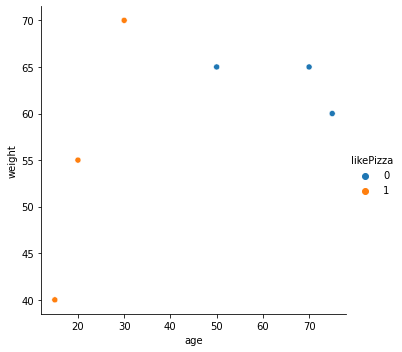

In [6]:
import seaborn as sns
sns.relplot(x='age',y='weight',hue='likePizza',data=df)

## Step4.Prepare X matrix and Y vector

In [7]:
X=pd.DataFrame(df)
cols=[0,1]
X=X[X.columns[cols]]

In [8]:
y=df['likePizza'].values


## Step5.Examine X and y

In [9]:
X

,age,weight
0,50,65
1,20,55
2,15,40
3,70,65
4,30,70
5,75,60


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
y

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [12]:
type(y)

numpy.ndarray

## Step6.Model Building

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

## Step7.Model testing

In [14]:
knn.predict(X)

array([0, 1, 1, 0, 1, 0], dtype=int64)

In [15]:
a=[25,50]
knn.predict([a])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [16]:
b=[60,60]
knn.predict([b])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Step8.Change n_neighbors=3

In [17]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [18]:
c=[25,50]
knn.predict([c])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
d=[60,60]
knn.predict([d])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

## Step9.Predict on entire dataset

In [21]:
y_pred=knn.predict(X)
y_pred

array([0, 1, 1, 0, 1, 0], dtype=int64)

## Step10.Find Accuracy

In [22]:
def accuracy(actual,pred):
    return sum(actual==pred)/float(actual.shape[0])

## Step11.Find accuracy

In [23]:
accuracy_score=accuracy(y,y_pred)
accuracy_score

1.0

## Step12.Prediction on test set

In [24]:
import pandas as pd
df=pd.read_csv('pizza_test.csv')

In [25]:
df.head()

,age,weight,likePizza
0,48,68,1
1,35,45,1
2,15,40,0
3,55,65,0


In [26]:
df.shape

(4, 3)

In [27]:
df.shape[0]

4

In [28]:
df.shape[1]

3

In [29]:
df.info

<bound method DataFrame.info of    age  weight  likePizza
0   48      68          1
1   35      45          1
2   15      40          0
3   55      65          0>

In [30]:
df.size

12

In [31]:
X=pd.DataFrame(df)
cols=[0,1]
X=X[X.columns[cols]]

In [32]:
y=df['likePizza'].values
y

array([1, 1, 0, 0], dtype=int64)

In [33]:
X

,age,weight
0,48,68
1,35,45
2,15,40
3,55,65


In [34]:
y

array([1, 1, 0, 0], dtype=int64)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
test=KNeighborsClassifier(n_neighbors=2)
test.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [36]:
y_pred=test.predict(X)
y_pred

array([0, 0, 0, 0], dtype=int64)

In [37]:
import numpy as np
s=np.array([1,1,0,0])
s

array([1, 1, 0, 0])

In [38]:
y_test=accuracy(s,y_pred)
y_test

0.5

## Step13.Find the best value for k

In [41]:
scores=[]
for k in range(1,4):
    kn=KNeighborsClassifier(n_neighbors=k)
    kn.fit(X,y)
    kn.predict(X)
    y_test=kn.predict(X)
    a=accuracy(s,y_pred)
    scores.append((k,a))
print(scores)

[(1, 0.5), (2, 0.5), (3, 0.5)]


## Step14.Accuracy_score function

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(s,y_pred)

0.5